# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

Я выяснила, что:
- разделителями файла выступает \t
- требуется сменить тип данных в столбцах: days_exposition, floor, floors_total, rooms - на целочисленный, first_day_exposition - на временной
- есть пропуски во многих столбцах

### Шаг 2. Предобработка данных

In [2]:
#ceiling_height 

#пропуски
data[data['ceiling_height'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,NaN,...,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23690,3,5500000.0,52.0,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.0,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23692,2,1350000.0,30.0,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.0,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


В столбце слишком много пропусков для замены на среднее (искажает выборку), оставлю пропуски

In [3]:
#cityCenters_nearest 

#пропуски
data[data['cityCenters_nearest'].isnull()]
loc_name_none = data[data['cityCenters_nearest'].isnull()].loc[:, ['cityCenters_nearest', 'locality_name']]
print(loc_name_none['locality_name'].value_counts())
data.query('locality_name == "деревня Кудрово"')
data.loc[data['locality_name']=='посёлок Мурино', 'cityCenters_nearest'] = 15000
data.loc[data['locality_name']=='Всеволожск', 'cityCenters_nearest'] = 21000
data.loc[data['locality_name']=='Гатчина', 'cityCenters_nearest'] = 35000
data.loc[data['locality_name']=='Выборг', 'cityCenters_nearest'] = 155000    

посёлок Мурино          522
Всеволожск              398
Гатчина                 307
деревня Кудрово         299
Выборг                  237
                       ... 
поселок Жилпосёлок        1
деревня Вахнова Кара      1
Пушкин                    1
Колпино                   1
деревня Чудской Бор       1
Name: locality_name, Length: 345, dtype: int64


В столбце с расстоянием до центра много пропусков для определенных населенных пунктов. Оказывается, для этих населенных пунктов вообще нет значений расстояния до центра. Поэтому я заполнила вручную
самые частые 4, используя Гугл карту.

In [4]:
#days_exposition

#пропуски
data[data['days_exposition'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,NaN,...,7.00,NaN,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,NaN,...,8.30,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,NaN,...,15.60,NaN,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,NaN,...,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В столбце со временем продажи так же много пропусков. Сомневаюсь, что их можно как-то заполнить данными. Удалять тоже не буду, так как остальные столбцы в большинстве заполнены

In [5]:
#first_day_exposition

#изменение типа данных на тип даты и времени
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Изменила тип данных в столбце со временем выставления на продажу на тип даты и времени. Время везде нулевое, поэтому остались только даты

In [6]:
#floor 

#изменение типа данных на целочисленный
data['floor'] = data['floor'].astype('int')

Столбец с этажем заменила на целочисленный, так как этажи измеряются только целыми числами

In [7]:
#floors_total

#пропуски
print(data[data['floors_total'].isnull()])
data['floors_total'] = data['floors_total'].fillna(value='0')

#изменение типа данных на целочисленный
data['floors_total'] = data['floors_total'].astype('int')
data.info()

       total_images  last_price  total_area first_day_exposition  rooms  \
186              12  11640000.0        65.2           2018-10-02      2   
237               4   2438033.0        28.1           2016-11-23      1   
457               4   9788348.0        70.8           2015-08-01      2   
671               4   6051191.0        93.6           2017-04-06      3   
1757              5   3600000.0        39.0           2017-04-22      1   
...             ...         ...         ...                  ...    ...   
22542             5   8500000.0        63.5           2017-05-24      2   
22656             4   4574160.0        64.5           2017-04-02      2   
22808             0  14569263.0       110.4           2016-11-20      3   
23590             0  21187872.0       123.3           2017-04-25      3   
23658             6   3063600.0        43.8           2016-11-28      1   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
186               NaN 

В столбце с количеством этажей в доме заменить пропуски нечем. Я заполнила их нулями, чтобы поменять тип данных на целочисленный (учту, что там нули в дальнейшем)

In [8]:
#kitchen_area 

#пропуски
data[data['kitchen_area'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19,1,NaN,9,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28,2,2.50,5,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18,1,NaN,22,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06,1,NaN,13,NaN,13,NaN,...,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.0,40.5,2016-09-08,1,2.56,18,19.6,10,False,...,NaN,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0
23663,12,6400000.0,88.0,2018-01-12,4,2.55,10,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.6,2018-02-08,1,2.80,9,NaN,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.0,2017-12-08,1,NaN,9,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Снова в столбце с плщадью кухни пропуски, которые нечем заменить. Поэтому я их оставляю

In [9]:
#locality_name 
print(data['locality_name'].unique())

#пропуски
data[data['locality_name'].isnull()]
print(data.pivot_table(index='locality_name', values='cityCenters_nearest', aggfunc=['min', 'max']))
#смотрю расстояние до центра для всех населенных пунктв   
data.loc[(data['locality_name'].isnull()) & (data['cityCenters_nearest']<20000), 'locality_name'] = 'Санкт-Петербург'
data[data['locality_name'].isnull()]

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2033,6,5398000.0,80.0,2017-05-30,3,NaN,4,42.6,2,NaN,...,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
8986,10,4850000.0,103.1,2018-07-10,3,NaN,0,68.1,4,NaN,...,16.7,NaN,NaN,19659.0,31813.0,0.0,NaN,0.0,NaN,28.0
13690,7,3500000.0,71.0,2016-06-23,3,2.75,2,45.6,1,False,...,8.0,2.0,NaN,20234.0,23659.0,0.0,NaN,2.0,296.0,92.0
14342,3,3611000.0,53.5,2017-04-27,1,NaN,4,25.8,3,False,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0
17535,2,5985000.0,79.8,2018-07-30,3,NaN,9,NaN,2,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.0
20382,8,1750000.0,72.9,2018-10-27,3,NaN,5,47.3,2,NaN,...,8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20590,7,3380000.0,56.0,2017-11-06,2,2.70,4,29.0,3,NaN,...,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0
21119,8,3500000.0,43.2,2018-11-11,2,NaN,4,NaN,2,NaN,...,NaN,NaN,NaN,19744.0,31897.0,0.0,NaN,0.0,NaN,9.0
21276,0,17122148.0,178.3,2017-02-10,1,NaN,3,NaN,1,NaN,...,41.6,1.0,NaN,60195.0,41294.0,0.0,NaN,0.0,NaN,4.0
21715,2,6047550.0,80.1,2018-07-30,2,NaN,9,30.5,2,False,...,29.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.0


Столбец с названиями населенных пунктов я проверила на дубликаты: обнаружилиль с дубликатами с буквами е и ё. Но их мало, и это, в основном, маленькие поселки, не вносящие вклад в данные. Исправлять не буду.
Есть 49 пропусков. Видно, что расстояние до центра для большинства небольшое, поэтому при расстоянии меньше 20км, я отнесла квартиру к Санкт-Петерургу. Остальные пропуски оставила пустыми

In [10]:
#rooms 

print(data['rooms'].value_counts())

#изменение типа данных на целочисленный
data['rooms'] = data['rooms'].astype('int')
data.loc[data['rooms'] == 0, 'rooms'] = None#заменяю ноль комнат на пропуск

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64


В количестве комнат я изменила тип на целочисленный и проверила имющиеся значения - все нормально, но есть нули, их я заменила на пропуск

### Шаг 3. Посчитайте и добавьте в таблицу

In [11]:
#цену квадратного метра
data['m2_price'] = data['last_price'] / data['total_area']

#день недели, месяц и год публикации объявления
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

#этаж квартиры; варианты — первый, последний, другой
for i in range(len(data)):

    if data.loc[i, 'floor'] == data.loc[i, 'floors_total']:
        data.loc[i, 'floor_class']='последний'
    elif data.loc[i, 'floor'] == 1:
        data.loc[i, 'floor_class'] = 'первый'
    elif 1 < data.loc[i, 'floor'] < data.loc[i, 'floors_total']:
        data.loc[i, 'floor_class'] = 'другой'
        
#соотношение жилой и общей площади, а также отношение площади кухни к общей
data['living_ratio_total'] = data['living_area'] / data['total_area']
data['kitchen_ratio_total'] = data['kitchen_area'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,m2_price,weekday,month,year,floor_class,living_ratio_total,kitchen_ratio_total
0,20,13000000.0,108.0,2019-03-07,3.0,2.70,16,51.0,8,NaN,...,2.0,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1.0,NaN,11,18.6,1,NaN,...,0.0,NaN,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2.0,NaN,5,34.3,4,NaN,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3.0,NaN,14,NaN,9,NaN,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2.0,3.03,14,32.0,13,NaN,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2_price,weekday,month,year,living_ratio_total,kitchen_ratio_total
count,23699.000000,2.369900e+04,23699.000000,23502.000000,14504.000000,23699.000000,21796.000000,23699.000000,21421.000000,12180.000000,...,8079.000000,18181.000000,9110.000000,20518.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,21796.000000,21421.000000
mean,9.858475,6.541549e+06,60.348651,2.087993,2.771499,10.635090,34.457852,5.892358,10.569807,1.150082,...,490.804555,0.770255,517.980900,180.888634,9.942166e+04,2.569307,6.400101,2017.367146,0.564766,0.187355
std,5.682529,1.088701e+07,35.654083,1.066050,1.261056,6.616396,22.030445,4.885249,5.905438,1.071300,...,342.317995,0.938346,277.720643,219.727988,5.030680e+04,1.789082,3.491561,1.039771,0.105368,0.072968
min,0.000000,1.219000e+04,12.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,...,288.000000,0.000000,294.000000,45.000000,7.658547e+04,1.000000,3.000000,2017.000000,0.495177,0.133333
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,...,455.000000,1.000000,502.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.567860,0.172414
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,...,612.000000,1.000000,729.000000,232.000000,1.142563e+05,4.000000,10.000000,2018.000000,0.637880,0.232416
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


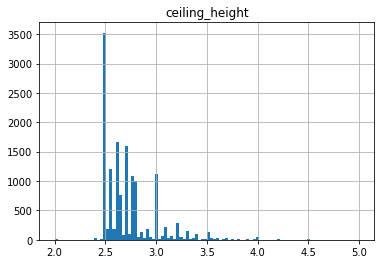

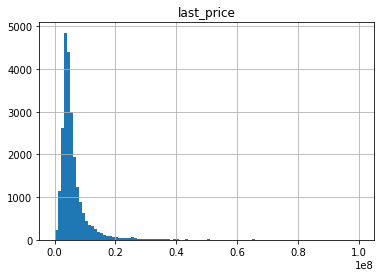

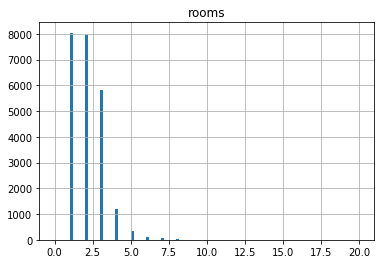

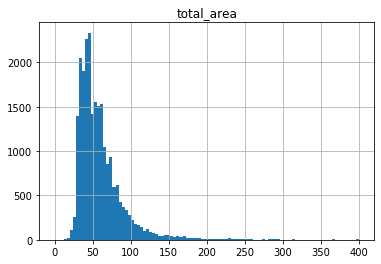

In [12]:
data.hist('ceiling_height', bins=100, range=(2, 5))
data.hist('last_price', bins=100, range=(0, 100000000))
data.hist('rooms', bins=100, range=(0, 20))
data.hist('total_area', bins=100, range=(0, 400))
data.describe()

<b> Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра</b>
Все гистограммы выглядят похоже на распределение Пуассона, я думаю, что грубых ошибок в этих данных нет.

Среднее 180.88863436982163
Медиана 95.0


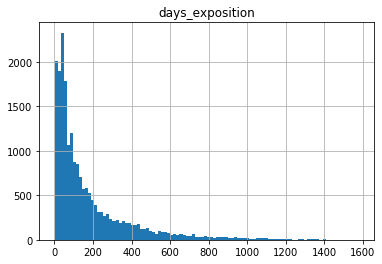

In [13]:
data.hist('days_exposition', bins=100)
print('Среднее', data['days_exposition'].mean())
print('Медиана', data['days_exposition'].median())

<b>Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?</b>

Медиана почти в 2 раза меньше среднего - значит, есть очень большие значения, которые искажают  среднее (основная часть значений попадает в интервал от 0 до 100). Поэтому время продажи я буду оценивать по медиане: продажа занимает обычно около 95 дней.
Значения больше 1000 дней соотвествуют очень долгим срокам продажи. Значения 1-2 дня - очень быстрой продаже, но, на мой взгляд, они ничему не противоречат.


In [14]:
#ceiling_height
data.query('ceiling_height < 2 or ceiling_height > 8')['ceiling_height'].value_counts() #нахожу аномалии
data.loc[data['ceiling_height']==27, 'ceiling_height'] = 2.7 #заменяю частые опечатки вручную
data.loc[data['ceiling_height']==25, 'ceiling_height'] = 2.5
data.loc[data['ceiling_height']==32, 'ceiling_height'] = 3.2
data[(data['ceiling_height'] < 2) | (data['ceiling_height'] > 8)]['ceiling_height'] = None #обнуляю оставшиеся аномалии
print(data['ceiling_height'].unique()) #проверяю оставшиеся значения
#last_price 
data[data['last_price'] < 100000]#очень низкая цена, возможно имеет место опечатка
data=data.drop(data[data['last_price'] < 100000].index)#удаляю эту строку

[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76   2.58
   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6    2.92
   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53   2.74
   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82   3.54
   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9    3.18
   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83   3.52
   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19   3.24
   4.8    4.5    4.2    3.36   3.08   3.68   3.07   3.37   3.09   8.
   3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68   3.22   3.27
   4.1    2.93   3.46  24.     3.47   3.33   3.63   3.32  26.     1.2
   8.3    2.98   2.86   3.17   4.4    3.28   3.04   4.45   5.5    3.84
   3.23   

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<b>Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.</b>
В столбце с высотой потолока были найдены явные опечатки, которые я исправила, так и неправильные значения, которые я удалила.
Одна цена квартины была очень низкая (без причины, на мой взгляд), я ее удалила.

total_images           0.104462
last_price             1.000000
total_area             0.653740
rooms                  0.364737
ceiling_height         0.120431
floors_total          -0.007040
living_area            0.566493
floor                  0.026683
studio                -0.025364
open_plan             -0.008804
kitchen_area           0.520346
balcony                0.029646
airports_nearest      -0.026218
cityCenters_nearest   -0.138416
parks_around3000       0.151078
parks_nearest         -0.016348
ponds_around3000       0.159972
ponds_nearest         -0.084809
days_exposition        0.081126
m2_price               0.736515
weekday                0.001542
month                  0.002755
year                  -0.043052
living_ratio_total     0.002431
kitchen_ratio_total   -0.089238
Name: last_price, dtype: float64
               last_price
floor_class              
другой       6.674074e+06
первый       4.820982e+06
последний    7.329188e+06
           last_price
weekday        

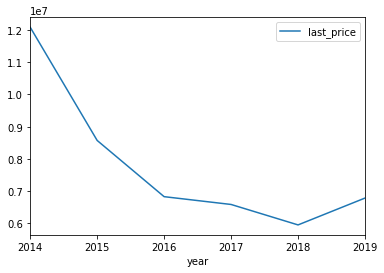

In [15]:
print(data.corr()['last_price'])
print(data.pivot_table(index='floor_class', values='last_price'))
print(data.pivot_table(index='weekday', values='last_price'))
print(data.pivot_table(index='month', values='last_price'))
data.pivot_table(index='year', values='last_price').plot()

<b>Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.</b>

Зависимость цены от близости к центру слабая (коэффициент корреляции -0.138426), от количества комнат немного сильнее (0.364793), от общей площади сильная (0.653806)
Дешевле всего квартиры на 1 этаже, дороже всего - на последнем
Зависимости цены от дня и месяца публикации на продажу нет, а вот от года публикации есть: цена постепенно падала до 2018, а после немного выросла (график).

In [16]:
data_loc = data['locality_name'].value_counts().sort_values(ascending=False).head(10)
data.query('locality_name in @data_loc.index').pivot_table(index='locality_name', values='m2_price').sort_values(by='m2_price', ascending=False)

,m2_price
locality_name,
Санкт-Петербург,114829.149707
Пушкин,103125.819291
деревня Кудрово,92473.547576
посёлок Парголово,90175.913458
посёлок Мурино,85752.189195
посёлок Шушары,78677.364217
Колпино,75424.579098
Гатчина,68746.146763
Всеволожск,68654.473986


<b>Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'</b>

Самая высокая стоимость жилья - в Санкт-Петербурге, на втором месте Пушкин. Самая низкая - в Выборге

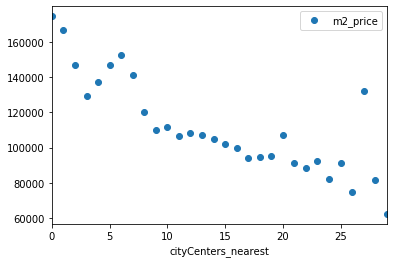

In [17]:
data_spb = data[data['locality_name'] == 'Санкт-Петербург'].copy()
data_spb['cityCenters_nearest'] = data_spb['cityCenters_nearest'] / 1000
data_spb['cityCenters_nearest'] = data_spb['cityCenters_nearest'].fillna(value='0')
data_spb['cityCenters_nearest'] = data_spb['cityCenters_nearest'].astype('int')
data_spb.pivot_table(index='cityCenters_nearest', values='m2_price').plot(style='o')

<b>Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона</b>

Судя по графику, центральная зона ограничена 10 км. При округлении значений расстояния до центра вылезает эта красная ошибка, хотя все работает.

total_images           0.130599
last_price             1.000000
total_area             0.644893
rooms                  0.355796
ceiling_height         0.057746
floors_total          -0.001992
living_area            0.551058
floor                  0.077286
studio                -0.024174
open_plan              0.008569
kitchen_area           0.513490
balcony                0.045330
airports_nearest      -0.014599
cityCenters_nearest   -0.149266
parks_around3000       0.119152
parks_nearest         -0.039976
ponds_around3000       0.134260
ponds_nearest         -0.082834
days_exposition        0.074602
m2_price               0.777235
weekday                0.016686
month                  0.006848
year                  -0.051456
living_ratio_total    -0.014408
kitchen_ratio_total   -0.090499
Name: last_price, dtype: float64
               last_price
floor_class              
другой       1.259730e+07
первый       8.276096e+06
последний    1.620987e+07


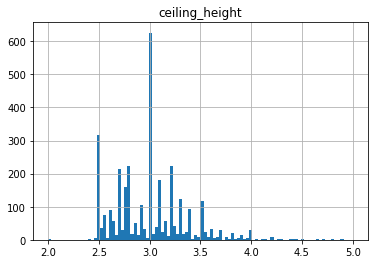

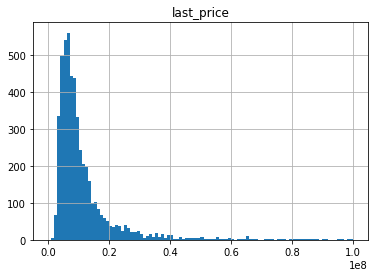

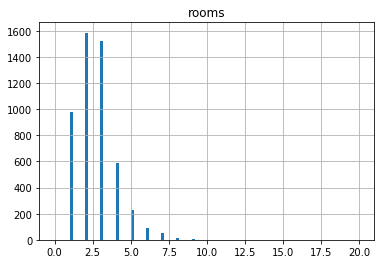

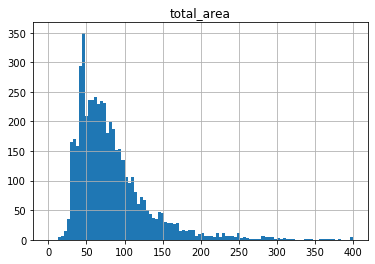

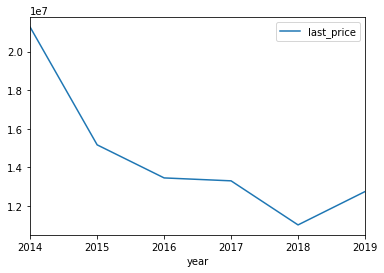

In [18]:
data_center = data[data['cityCenters_nearest'] < 10000]
data_center.hist('ceiling_height', bins=100, range=(2, 5))
data_center.hist('last_price', bins=100, range=(0, 100000000))
data_center.hist('rooms', bins=100, range=(0, 20))
data_center.hist('total_area', bins=100, range=(0, 400))

print(data_center.corr()['last_price'])
print(data_center.pivot_table(index='floor_class', values='last_price'))
data_center.pivot_table(index='year', values='last_price').plot()#аналогично со всеми данными

<b>Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?</b>

Высота потолков в центре больше (около 3 метров), комнат в основном 2 или 3, тогда как во всех данных большинство - однокомнатные квартиры. Площадь и цены практически не отличаются
Зависимость цены от близости к центру слабая (коэффициент корреляции -0.149160), от количества комнат немного сильнее (0.355797), и от площади еще сильнее (0.644968). Аналогичные значения и для всех данных.
Дешевле всего квартиры на 1 этаже, дороже всего - на последнем, но разница в цене более резкая, чем для всех данных 


### Шаг 5. Общий вывод

В данной работе были проанализированы данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

Была проведена <b>предобработка данных</b>, включавшая в себя:
- смену типа данных в некоторых столбцах
- общую оценку данных по гистограммам или подсчету значений в столбце
- поиску пропусков
- заполнению пропусков (в основном, в столбцах по расстоянию до центра или названию населенного пункта, так как они взаимосвязаны). По большей части, пропуски я оставила незаполненным, так как их заполнение может существенно исказить результаты, а для правдивого заполнения я не обладаю нужной информацией.

<b>Полученные результаты:</b>
- Продажа квартиры занимает обычно около 95 дней
- Зависимость цены от близости к центру города слабая, а от общей площади сильная
- Цена на квартиру зависит от года публикации: цена постепенно падала до 2018, а после немного выросла
- Самая высокая стоимость жилья - в Санкт-Петербурге, на втором месте Пушкин. Самая низкая - в Выборге
- В Санкт-Петербурге можно выделить центральную зону (радусом примерно 10 км), в которой цены на квартиры имеют больший разброс (там много квартир по ценам как в пригороде, но и много значительно более дорогих квартир). Так же в центре больше высота потолков (3 метра, а в пригороде ближе к 2,5) и больше количество комнат в квартирах в среднем (в пригороде 1 комната, в центре - 2 или 3). В остальном центр похож на пригород.